<a href="https://colab.research.google.com/github/topguns837/Chess-Piece-Detection/blob/vgg16/Chess_Piece_Detection_Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

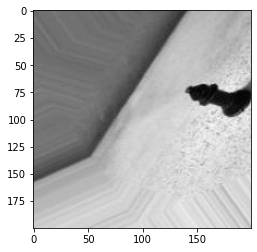

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "drive/MyDrive/Chess_Piece_Images"
CATEGORIES = [ "Black_Bishop" , "White_Bishop" , "Black_Knight" , "White_Knight" , "Black_Rook" , "White_Rook" , 
              "Black_King" , "White_King"  , "Black_Queen" , "White_Queen" , "Black_Pawn" , "White_Pawn"]

for category in CATEGORIES : 
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path) :
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE )  # cv2.IMREAD_GRAYSCALE

        #gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
        plt.imshow(img_array , cmap='gray')
        break
    break

In [ ]:
IMG_SIZE = 80

training_data = []

def create_training_data() :
    for category in CATEGORIES : 
        path = os.path.join(DATADIR,category)
    
        class_num = CATEGORIES.index(category) 
    
        for img in os.listdir(path) :           
            
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) # cv2.IMREAD_GRAYSCALE
                
            img_array = cv2.resize(img_array , (IMG_SIZE , IMG_SIZE))

            stacked_img = np.stack((img_array,)*3, axis=-1)
            #training_data.append([new_array, class_num])
                
            #gray = cv2.cvtColor(new_array)

            #img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

            training_data.append([stacked_img  , class_num])
            
            
        
create_training_data()

In [ ]:
X = []
y = []

for features , label in training_data :
    X.append(features)
    y.append(label)

#X = data["Image"]
#y = data["Target"]


    
X = np.array(X).reshape(-1, IMG_SIZE , IMG_SIZE , 3) 

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size = 0.2)

In [ ]:
import tensorflow as tf


X_train , y_train = tf.convert_to_tensor(X_train) , tf.convert_to_tensor(y_train)
X_test , y_test = tf.convert_to_tensor(X_test , dtype = tf.float64) , tf.convert_to_tensor(y_test , dtype = tf.float64)

In [ ]:
import tensorflow as tf

model_vgg16 = tf.keras.models.load_model('vgg_16_50_epochs.h5')

In [ ]:
import pandas as pd
import numpy as np

y_preds_encoded = model_vgg16.predict(X_test)
y_preds = np.argmax(y_preds_encoded, axis = 1)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds, target_names=CATEGORIES))

              precision    recall  f1-score   support

Black_Bishop       0.12      0.04      0.06       433
White_Bishop       0.00      0.00      0.00       464
Black_Knight       0.24      0.44      0.31       459
White_Knight       0.10      0.01      0.01       431
  Black_Rook       0.15      0.33      0.21       420
  White_Rook       0.27      0.08      0.13       437
  Black_King       0.19      0.30      0.23       427
  White_King       0.28      0.03      0.05       444
 Black_Queen       0.21      0.62      0.32       475
 White_Queen       0.23      0.02      0.04       464
  Black_Pawn       0.26      0.57      0.36       469
  White_Pawn       0.32      0.08      0.13       451

    accuracy                           0.21      5374
   macro avg       0.20      0.21      0.15      5374
weighted avg       0.20      0.21      0.16      5374



In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_preds_encoded, average="weighted", multi_class="ovr")

0.5797773075683519